In [4]:
%pylab inline
import cosima_cookbook as cc
import numpy as np
import matplotlib.pyplot as plt # to generate plots
import xarray as xr
import scipy as sp
import pandas as pd
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import netCDF4 as nc
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap # plot on map projections
from glob import glob
import scipy.interpolate
import scipy.ndimage
from tqdm import tqdm_notebook
import IPython.display
import pylab
from matplotlib import ticker, cm
# for georefferenced data
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm # for colormap
from sklearn import preprocessing
import cartopy.mpl.ticker as cticker
import matplotlib.ticker as mticker
import dask
#dask.config.set({'temporary_directory': '/g/data/e14/ss2778/data'})
import matplotlib.path as mpath
import dask.diagnostics 
from dask.diagnostics import ProgressBar
dask.diagnostics.ProgressBar().register()

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Creating my own database:
db = '/g/data/e14/ss2778/cc_test1.db'
session = cc.database.create_session(db)

In [88]:
from distributed import Client, LocalCluster

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


In [90]:
cluster = LocalCluster(ip='localhost',
                       n_workers=4,
                       threads_per_worker=2,
                       dashboard_address=8813,
                       memory_limit=8e+9)
client = Client(cluster)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8813 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [7]:
dir_list=['/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf9091']
cc.database.build_index(dir_list,session,update=True)

Indexing experiment: 01deg_jra55v13_ryf9091


0it [00:00, ?it/s]


0

In [8]:
session = cc.database.create_session()
experiments = cc.querying.get_experiments(session)

In [9]:
experiments[experiments['experiment'].str.contains('01deg_jra55v13_ryf9091')]

,experiment,ncfiles
18,01deg_jra55v13_ryf9091_spinup1,20
94,01deg_jra55v13_ryf9091,4381
109,01deg_jra55v13_ryf9091_tides,18
110,01deg_jra55v13_ryf9091_0Kv,37
111,01deg_jra55v13_ryf9091_5Kv,48
113,01deg_jra55v13_ryf9091_topo_bug_test,20
134,01deg_jra55v13_ryf9091_gaditest,49
135,01deg_jra55v13_ryf9091_newdawn,14
145,01deg_jra55v13_ryf9091_gadi_retest,41


In [10]:
expt = '01deg_jra55v13_ryf9091'
variables = cc.querying.get_variables(session, expt, '1 monthly')

In [42]:
%%time
pot_rho_0 = cc.querying.getvar(expt, 'pot_rho_0', session,n=-10)#start_time='1960-01-01', end_time='1970-12-31',n=1)

CPU times: user 1.13 s, sys: 56 ms, total: 1.18 s
Wall time: 3.69 s


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/cosima_cookbook/querying.py:134: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  **xr_kwargs
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [43]:
pot_rho_0

<xarray.DataArray 'pot_rho_0' (time: 30, st_ocean: 75, yt_ocean: 2700, xt_ocean: 3600)>
dask.array<concatenate, shape=(30, 75, 2700, 3600), dtype=float32, chunksize=(1, 7, 300, 400), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * time      (time) object 1985-04-16 00:00:00 ... 1987-09-16 00:00:00
Attributes:
    long_name:      potential density referenced to 0 dbar
    units:          kg/m^3
    valid_range:    [-1.e+01  1.e+05]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_density

In [103]:
%%time
temp= cc.querying.getvar(expt, 'temp', session)#start_time='1960-01-01', end_time='1970-12-31')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/cosima_cookbook/querying.py:134: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  **xr_kwargs
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/g/data3/hh5/public/apps/min

CPU times: user 4min 39s, sys: 18 s, total: 4min 57s
Wall time: 5min 18s


In [109]:
temp[5500:,:,:,:]

<xarray.DataArray 'temp' (time: 2877, st_ocean: 75, yt_ocean: 2700, xt_ocean: 3600)>
dask.array<getitem, shape=(2877, 75, 2700, 3600), dtype=float32, chunksize=(1, 7, 300, 400), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * time      (time) object 1964-01-20 12:00:00 ... 1987-09-16 00:00:00
Attributes:
    long_name:      Conservative temperature
    units:          deg_C
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t

In [17]:
t7=temp[:,:,:,:]
t7=t7-273.15

In [20]:
T7m = t7.mean('time')
T7y=T7m.sel(st_ocean=slice(0,3000)).sel(yt_ocean=slice(-70,0))
T7_za=T7y.mean('xt_ocean')
#T3_za=np.ma.masked_invalid(T3_za)
T7_za.shape

(60, 982)

In [46]:
p7m = pot_rho_0.mean('time')
p7y=p7m.sel(st_ocean=slice(0,3000)).sel(yt_ocean=slice(-70,0))
p7_za=p7y.mean('xt_ocean')
P7=(p7_za)-1000.0
#T3_za=np.ma.masked_invalid(T3_za)
p7_za.shape

(60, 982)

CPU times: user 1min 11s, sys: 4.45 s, total: 1min 16s
Wall time: 2min


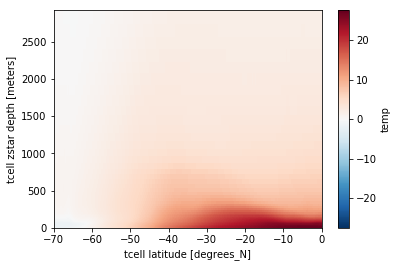

In [21]:
%%time
T7_za.plot()

Text(0,0.5,'Depth (m)')

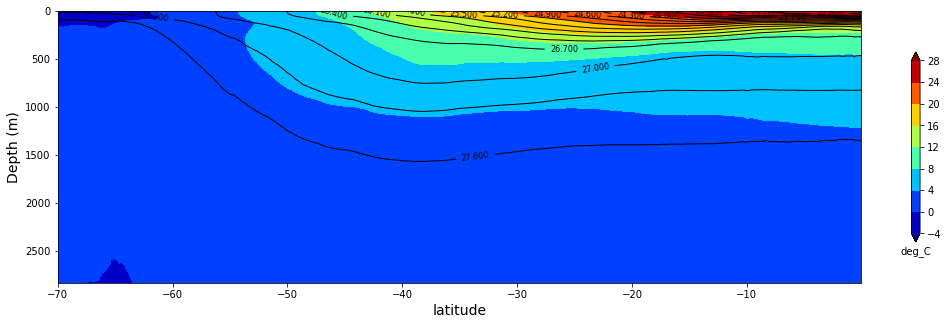

In [47]:
#Tmax = 30; Tmin = -5; delT = 1
#clevels = np.arange(Tmin,Tmax+delT,delT)
#clev=np.arange(-,30,2)
lat= T7_za.yt_ocean
dep=T7_za.st_ocean
fig= plt.figure( figsize=(18,5))
plt.contourf(lat, dep, T7_za, cmap=plt.cm.jet, extend='both')# vmin=8., vmax=30.)
cbar = plt.colorbar(orientation='vertical', shrink = 0.7)
cbar.ax.set_xlabel('deg_C')
#plt.contour(lat,dep, T7_za,20, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
c=plt.contour(lat,dep,P7,20, colors='k', linewidths=1)
plt.clabel(c, inline=True, fontsize=8)
plt.xlabel('latitude', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
#fig.savefig('T3_xa_3000.png',dpi=300,bbox_inches='tight')

In [24]:
%%time
salt = cc.querying.getvar(expt, 'salt', session,n=-10)#start_time='1960-01-01', end_time='1970-12-31')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/cosima_cookbook/querying.py:134: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  **xr_kwargs
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


CPU times: user 742 ms, sys: 49 ms, total: 791 ms
Wall time: 3.01 s


In [25]:
S7m = salt.mean('time')
S7y=S7m.sel(st_ocean=slice(0,3000)).sel(yt_ocean=slice(-70,0))
S7_za=S7y.mean('xt_ocean')
#T3_za=np.ma.masked_invalid(T3_za)
S7_za.shape

(60, 982)

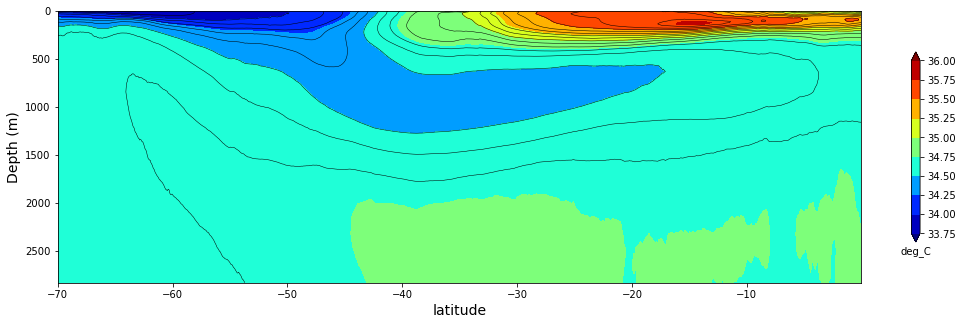

In [26]:
#Tmax = 30; Tmin = -5; delT = 1
#clevels = np.arange(Tmin,Tmax+delT,delT)
#clev=np.arange(-,30,2)
lat= S7_za.yt_ocean
dep=S7_za.st_ocean
fig= plt.figure( figsize=(18,5))
plt.contourf(lat, dep, S7_za, cmap=plt.cm.jet, extend='both')# vmin=8., vmax=30.)
cbar = plt.colorbar(orientation='vertical', shrink = 0.7)
cbar.ax.set_xlabel('deg_C')
plt.contour(lat,dep, S7_za,20, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
#plt.contour(lat_140w,dep, iso_140w,20, colors='k', linewidths=1)
plt.xlabel('latitude', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
fig.savefig('Salt.png',dpi=300,bbox_inches='tight')

In [34]:
data3=(xr.open_mfdataset('/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf9091/output24*/ocean/ocean.nc'))
data7= (xr.open_mfdataset('/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf9091/output26*/ocean/ocean.nc'))
data5=(xr.open_mfdataset('/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf9091/output25*/ocean/ocean.nc'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [40]:
data=(xr.open_mfdataset('/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf9091/output2**/ocean/ocean.nc'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [41]:
data

<xarray.Dataset>
Dimensions:                (grid_xt_ocean: 3600, grid_xu_ocean: 3600, grid_yt_ocean: 2700, grid_yu_ocean: 2700, neutral: 80, neutralrho_edges: 81, nv: 2, potrho: 80, potrho_edges: 81, st_edges_ocean: 76, st_ocean: 75, sw_edges_ocean: 76, sw_ocean: 75, time: 300, xt_ocean: 3600, xu_ocean: 3600, yt_ocean: 2700, yu_ocean: 2700)
Coordinates:
  * potrho                 (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * neutralrho_edges       (neutralrho_edges) float64 1.028e+03 ... 1.038e+03
  * sw_ocean               (sw_ocean) float64 1.083 2.279 ... 5.61e+03 5.809e+03
  * xu_ocean               (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.9 80.0
  * yt_ocean               (yt_ocean) float64 -81.11 -81.07 ... 89.94 89.98
  * grid_xt_ocean          (grid_xt_ocean) float64 -279.9 -279.8 ... 79.85 79.95
  * grid_yu_ocean          (grid_yu_ocean) float64 -81.09 -81.05 ... 89.96 90.0
  * neutral                (neutral) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges           (potrho_edges) float64 1.028e+03 ... 1.038e+03
  * st_ocean               (st_ocean) float64 0.5413 1.681 ... 5.709e+03
  * grid_yt_ocean          (grid_yt_ocean) float64 -81.11 -81.07 ... 89.94 89.98
  * grid_xu_ocean          (grid_xu_ocean) float64 -279.9 -279.8 ... 79.9 80.0
  * nv                     (nv) float64 1.0 2.0
  * sw_edges_ocean         (sw_edges_ocean) float64 0.5128 1.652 ... 5.809e+03
  * yu_ocean               (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
  * st_edges_ocean         (st_edges_ocean) float64 0.0 1.083 ... 5.809e+03
  * xt_ocean               (xt_ocean) float64 -279.9 -279.8 ... 79.85 79.95
  * time                   (time) object 1951-01-16 12:00:00 ... 1975-12-16 12:00:00
Data variables:
    temp                   (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    pot_temp               (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    salt                   (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    age_global             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    u                      (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    v                      (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    wt                     (time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    dzt                    (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    pot_rho_2              (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    pot_rho_0              (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    tx_trans               (time, st_ocean, yt_ocean, xu_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    ty_trans               (time, st_ocean, yu_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    ty_trans_submeso       (time, st_ocean, yu_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    tx_trans_rho           (time, potrho, grid_yt_ocean, grid_xu_ocean) float32 dask.array<chunksize=(3, 80, 2700, 3600), meta=np.ndarray>
    ty_trans_rho           (time, potrho, grid_yu_ocean, grid_xt_ocean) float32 dask.array<chunksize=(3, 80, 2700, 3600), meta=np.ndarray>
    ty_trans_nrho_submeso  (time, neutral, grid_yu_ocean, grid_xt_ocean) float32 dask.array<chunksize=(3, 80, 2700, 3600), meta=np.ndarray>
    temp_xflux_adv         (time, st_ocean, yt_ocean, xu_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=n

In [81]:
T7=data7['temp']

In [113]:
T7s=T7[12:24,:60,255:1245,:]
T7m=T7s.mean('time')
T7x=T7m.mean('xt_ocean')
T7x.shape

(60, 990)

MemoryError: Unable to allocate array with shape (3, 60, 990, 3600) and data type float32

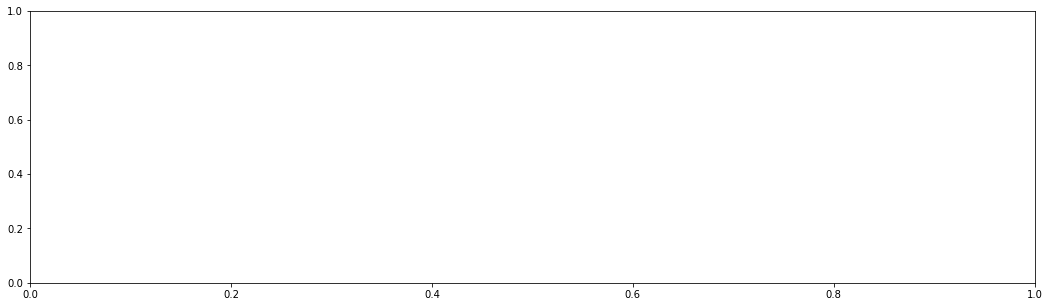

In [114]:
#Tmax = 30; Tmin = -5; delT = 1
#clevels = np.arange(Tmin,Tmax+delT,delT)
#clev=np.arange(-,30,2)
lat= T7x.yt_ocean
dep=T7x.st_ocean
fig= plt.figure( figsize=(18,5))
plt.contourf(lat, dep, T7x, cmap=plt.cm.jet, extend='both')# vmin=8., vmax=30.)
cbar = plt.colorbar(orientation='vertical', shrink = 0.7)
cbar.ax.set_xlabel('deg_C')
#plt.contour(lat,dep, T7_za,20, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
#c=plt.contour(lat,dep,P7,20, colors='k', linewidths=1)
plt.clabel(c, inline=True, fontsize=8)
plt.xlabel('latitude', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
fig.savefig('T7x.png',dpi=300,bbox_inches='tight')

In [87]:
T7.compute()

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker

KilledWorker: ("('open_dataset-concatenate-0a0c2aaa2cc4c03305401ddb4e607df7', 7, 0, 0, 0)", <Worker 'tcp://127.0.0.1:40265', memory: 0, processing: 3>)

In [86]:
%%time
T7x.compute()

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting

KilledWorker: ("('mean_chunk-6dcd20b07d19881d6361ac115a31d730', 3, 0, 0, 0)", <Worker 'tcp://127.0.0.1:33211', memory: 0, processing: 1>)

In [ ]:
#Seasonal Mld plots:
Ty=temp.sel(st_ocean=slice(0,3000)).sel(yt_ocean=slice(-70,0))
T_za=Ty.mean('xt_ocean')
temp_season_mean = T_za.groupby('time.season').mean('time')
temp_season = temp.groupby('time.season')
temp_season_anom = temp_season - temp_season_mean

In [ ]:
DJF=temp_season_mean[0,:,:] #DJF
JJA=temp_season_mean[1,:,:] #JJA
MAM=temp_season_mean[2,:,:] #MAM
SON=temp_season_mean[3,:,:] #SON